# Seminar: SVM, Kernel trick
Machine Learning by prof. Evgeny Burnaev 
<br>
Author: Andrey Lange

Given training data $x_i \in \mathbb{R}^p$, $y_i\in\{-1, 1\}$, $i=1,\ldots, n$, we have the following problem: 

Primal problem:

\begin{equation}
    \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} \xi_i \longrightarrow \min_{w, b, \xi},\\
      \begin{split}
      \textrm {subject to }\ & y_i (w^T \phi(x_i) + b) \geq 1 - \xi_i,\\
                             & \xi_i \geq 0.
      \end{split}
\end{equation}


Dual problem:

\begin{equation}
    \frac{1}{2} \sum_{i=1}^n\sum_{j=1}^n \alpha_i\alpha_j y_i y_j \underbrace{\phi(x_i)^{T} \phi(x_j)}_{K(x_i, x_j)} - \sum_{i=1}^n \alpha_i \longrightarrow  \min_{\alpha}, \\
    \begin{split}
    \textrm {subject to }\ & \sum_{i=1}^n y_i \alpha_i = 0,\\
                           & 0 \leq \alpha_i \leq C.
    \end{split}
\end{equation}

The decision function is a sum over only SUPPORT data points $S$:


\begin{equation}
y(x)= w^T\phi(x) + b = \sum_{x_i \in S} \alpha_i y_i K(x_i, x) + b \qquad \qquad (1)
\end{equation}

One key point here is that the sum is over only the support vectors!

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Example 1: Separation by a hyperplane

accuracy on the training set: 0.9803921568627451


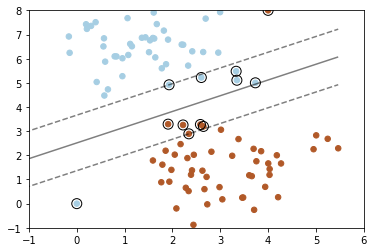

In [7]:
from sklearn import svm, datasets, metrics

X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.0, center_box = (-15, 15), random_state=0)
X = np.concatenate((X, [[4, 8], [0, 0]]))
y = np.concatenate((y, [1, 0]))

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlim(-1, 6)
plt.ylim(-1, 8)

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# create grid to evaluate model
xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
yy = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

print('accuracy on the training set:', metrics.accuracy_score(y, clf.predict(X)))

### Question 1.1: Change the code above to make accuracy of 1. Do not tune any hyperparameters of SVM.

### Solution 1.1:
Simply remove strings

```python
X = np.concatenate((X, [[4, 8], [0, 0]]))
y = np.concatenate((y, [1, 0]))
```

that add outliers to the dataset and classes will become separable

### Question 1.2: Is SVM sensitive to outliers?

### Solution 1.2: One can say "Yes": after removing two outliers the solution has been singificantly changed

### Question 1.3: How to calculate the value of accuracy without any function call, just looking on the code and on the picture?

### Solution 1.3:

The accuracy is 100/102, because only 2 outliers among 102 points were missclassified

accuracy on the training set: 1.0
accuracy on the training set: 1.0


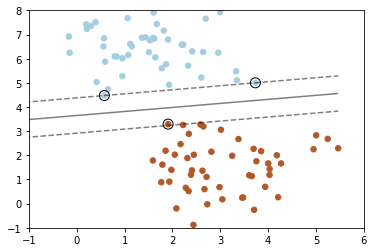

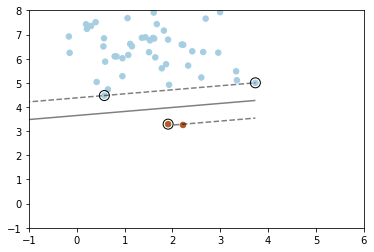

In [8]:
from sklearn import svm, datasets, metrics

# ======= 1: =======
X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.0, center_box = (-15, 15), random_state=0)

plt.figure(2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlim(-1, 6)
plt.ylim(-1, 8)

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# create grid to evaluate model
xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
yy = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

print('accuracy on the training set:', metrics.accuracy_score(y, clf.predict(X)))

# ======= 2: =======
X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.0, center_box = (-15, 15), random_state=0)
p1 = np.array([0.57661937, 4.47488452])
p2 = np.array([3.73415974, 5.00131532])
p3 = np.array([1.90977788, 3.29011668])
det = lambda x, y: x[0]*y[1] - x[1]*y[0]
# some_up = [det(x, p2-p1) > det(p1, p2-p1)*1.01 for x in X]
some_up = [det(x, p2-p1) < det(p3, p2-p1)*0.96 for x in X]
X = X[some_up]
y = y[some_up]

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlim(-1, 6)
plt.ylim(-1, 8)

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# create grid to evaluate model
xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
yy = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

print('accuracy on the training set:', metrics.accuracy_score(y, clf.predict(X)))



### Question 1.4: Does the decision function change after removing some points in the example below? It looks similar. Approximately or exactly?
\begin{equation}
y(x)= w^T\phi(x) + b = \sum_{x_i \in S} \alpha_i y_i K(x_i, x) + b
\end{equation}

accuracy on the training set: 1.0
accuracy on the training set: 1.0


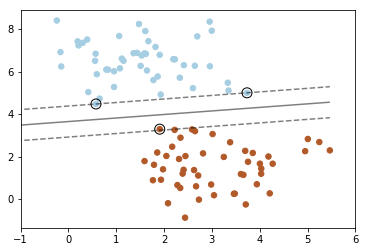

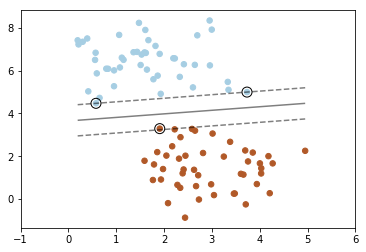

In [9]:
from sklearn import svm, datasets, metrics 

# ======= 1: =======
X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.0, center_box = (-15, 15), random_state=0)

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlim(-1, 6)

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# create grid to evaluate model
xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
yy = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

print('accuracy on the training set:', metrics.accuracy_score(y, clf.predict(X)))

# ======= 2: =======
X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.0, center_box = (-15, 15), random_state=0)

### now remove some outlier-like points
only_them = np.logical_and((0 < X[:, 0]), (X[:, 0] < 5))
X = X[only_them]
y = y[only_them]
### 

plt.figure(2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlim(-1, 6)

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# create grid to evaluate model
xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
yy = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

print('accuracy on the training set:', metrics.accuracy_score(y, clf.predict(X)))

### Solution 1.4: They are exactly the same because solution (1) depends only on support vectors, which are the same

### Question 1.5: Is SVM sensitive to outliers :) ?

### Solution 1.5: Do not be a bore ;)

## Example 2: Primal SVM and explicit transforms

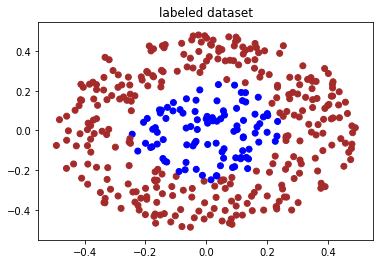

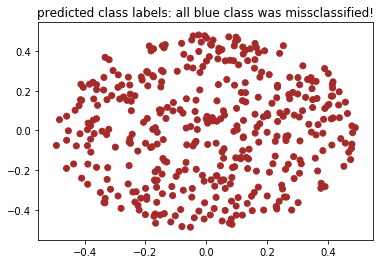

accuracy on the training set: 0.7569620253164557


In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/adasegroup/ML2020_seminars/master/seminar4/data/dataset0.csv')
X = df[['X1', 'X2']]
y = df['y']
plt.scatter(X['X1'], X['X2'], c=['brown' if c == 1 else 'b' for c in y])
plt.title('labeled dataset')
plt.show()

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

plt.scatter(X['X1'], X['X2'], c=['brown' if c == 1 else 'b' for c in clf.predict(X)])
plt.title('predicted class labels: all blue class was missclassified!')
plt.show()

print('accuracy on the training set:', metrics.accuracy_score(y, clf.predict(X)))

### Question 2.1: One of the ideas of SVM is that to transform the initial features to some other space where the classes are better separated by a hyperplane. What about using the polar coordinates in the example above? Apply it and show how SVM works with such a new basis using the following template.

accuracy on the training set: 0.7569620253164557


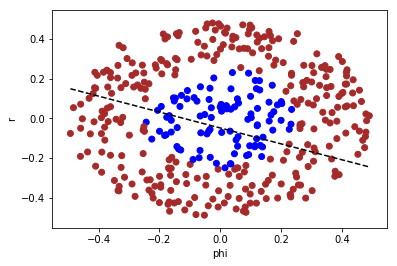

In [11]:
df = pd.read_csv('dataset0.csv')
X = df[['X1', 'X2']]
y = df['y']

def to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return phi, r

# --- HERE IS YOUR CODE!!!
# change this block so that it gives new pandas DataFrame called X_transform 
# with columns 'phi' and 'r' and X and X_transform have the corresponding rows of data.
X_transform = pd.DataFrame()
X_transform['phi'] = X['X1'] # its wrong
X_transform['r'] = X['X2']   # its wrong
# --- HERE IS YOUR CODE!!!

clf = svm.SVC(kernel='linear')
clf.fit(X_transform, y)
print('accuracy on the training set:', metrics.accuracy_score(y, clf.predict(X_transform)))

plt.scatter(X_transform['phi'], X_transform['r'], c=['brown' if c == 1 else 'b' for c in y])
plt.xlabel('phi')
plt.ylabel('r')

pp = np.linspace(X_transform['phi'].min(), X_transform['phi'].max(), 30)
rr = np.linspace(X_transform['r'].min(), X_transform['r'].max(), 30)
RR, PP = np.meshgrid(rr, pp)
pr = np.vstack([PP.ravel(), RR.ravel()]).T
Z = clf.decision_function(pr).reshape(PP.shape)
plt.contour(PP, RR, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()

### Solution 2.1:
One can use this code
```python
phi, r = to_polar(X['X1'], X['X2'])
X_transform = pd.DataFrame({'phi': phi, 'r': r})
```

### Question 2.2: The separating hyperplane (line in 2D) in polar basis above looks strange: why shouldn't it be a little higher because many blue points are missclassified - they are on the other side of the line! We need to tune the hyperparameters of the model - constant $C$ in SVM. Try different values of $C$, using the code below and then find the optimal value of $C$, which provides the maximum accuracy.


accuracy on the training set: 0.7569620253164557


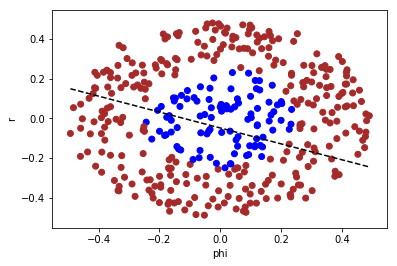

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/adasegroup/ML2020_seminars/master/seminar4/data/dataset0.csv')
X = df[['X1', 'X2']]
y = df['y']

# # --- YOUR CODE HERE!!!
# change X_transform as from the question above
X_transform = pd.DataFrame()
X_transform['phi'] = X['X1']
X_transform['r'] = X['X2']
# select the optimal C among some set of values (say from 10**-5 to 10**5)
# providing the best model 'clf' and print its accuracy metric on the training dataset
clf = svm.SVC(kernel='linear', C=1).fit(X_transform, y)
print('accuracy on the training set:', metrics.accuracy_score(y, clf.predict(X_transform)))
# # --- YOUR CODE HERE!!!

plt.scatter(X_transform['phi'], X_transform['r'], c=['brown' if c == 1 else 'b' for c in y])
plt.xlabel('phi')
plt.ylabel('r')

pp = np.linspace(X_transform['phi'].min(), X_transform['phi'].max(), 30)
rr = np.linspace(X_transform['r'].min(), X_transform['r'].max(), 30)
RR, PP = np.meshgrid(rr, pp)
pr = np.vstack([PP.ravel(), RR.ravel()]).T
Z = clf.decision_function(pr).reshape(PP.shape)
plt.contour(PP, RR, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()

### Solution 2.2:
You can use the code
```python
# tuning of C
best_C = None
best_acc = 0
for c in [0.1, 1, 10, 100, 1000, 10**4, 10**5]:
    clf = svm.SVC(kernel='linear', C=c).fit(X_transform, y)
    acc = metrics.accuracy_score(y, clf.predict(X_transform))
    if (acc > best_acc):
        best_acc = acc
        best_C = c
clf = svm.SVC(kernel='linear', C=best_C)
clf.fit(X_transform, y)
print('best C:', best_C)
print('accuracy on the training set:', metrics.accuracy_score(y, clf.predict(X_transform)))
```
or using `GridsearchCV()`:
```python
# tuning of C
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
clf = svm.SVC(kernel='linear')
clf = GridSearchCV(clf, 
                   {'C': [0.1, 1, 10, 100, 1000, 10**4, 10**5]}, 
                   scoring=make_scorer(accuracy_score),  # we can skip this line because accuracy_score is by default
                   cv = [(range(len(y)), range(len(y)))] # only 1 split and training and testing sets are the same
                   )
clf.fit(X_transform, y)
print('best C:', clf.best_params_['C'])
print('accuracy on the training set:', clf.best_score_)
```
We obtain:
```
best C: 10000
accuracy on the training set: 1.0
```

### Question 2.3: Usually, SVM uses the transform into a space with the dimension that is higher than the dimension of the initial data because it makes easier to separate classes by a hyperplane there. Unlike to polar coordinates, one can try the transform
### $$y_1=x_1, \quad y_2=x_2, \quad y_3=|x_1|+|x_2|.$$
### Why classes are better separable in that 3D space? Imagine the picture in 3D. Since we have previously tuned the model even reaching the accuracy of 1, improve this transform and the range for hyperparameter $C$ for better fitting.

best C: 1
accuracy on the training set: 0.9772151898734177


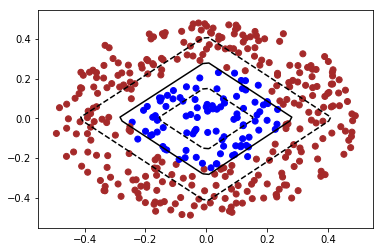

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

df = pd.read_csv('https://raw.githubusercontent.com/adasegroup/ML2020_seminars/master/seminar4/data/dataset0.csv')
X = df[['X1', 'X2']]
y = df['y']

# --- YOUR CODE HERE !!! improve the transform
def to_y1y2y3(x1, x2):
    y1 = x1
    y2 = x2
    y3 = abs(x1) + abs(x2)
    return y1, y2, y3
# --- YOUR CODE HERE !!! improve the transform

# improve the range for hyperparameter C
y1, y2, y3 = to_y1y2y3(X['X1'], X['X2'])
X_transform = pd.DataFrame({'Y1': y1, 'Y2': y2, 'Y3': y3})
clf = GridSearchCV(svm.SVC(kernel='linear'),
                   {'C': [1]},         # YOUR CODE HERE, IMPROVE THE RANGE  !!!
                   scoring=make_scorer(accuracy_score),  # we can skip this line because accuracy_score is by default
                   cv = [(np.array(range(len(y))), np.array(range(len(y))))] # only 1 split and training and testing sets are the same
                   )
clf.fit(X_transform, y)
print('best C:', clf.best_params_['C'])
print('accuracy on the training set:', clf.best_score_)

xx1 = np.linspace(X['X1'].min(), X['X1'].max(), 50)
xx2 = np.linspace(X['X2'].min(), X['X2'].max(), 50)
XX1, XX2 = np.meshgrid(xx1, xx2)
YY1, YY2, YY3 = to_y1y2y3(XX1, XX2)
xy = np.vstack([YY1.ravel(), YY2.ravel(), YY3.ravel()]).T
Z = clf.decision_function(xy).reshape(XX1.shape)
plt.scatter(X['X1'], X['X2'], c=['brown' if c == 1 else 'b' for c in y])
plt.contour(XX1, XX2, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.show()

### Solution 2.3:
You can use the transform
```
def to_y1y2y3(x1, x2):
    y1 = x1
    y2 = x2
    y3 = x1**2 + x2**2
    return y1, y2, y3
```
and select the best $C$ from the set of values (for example)
```
{'C': [1, 10, 100, 1000, 10**5, 10**6]}
```
It provides
```
best C: 1000000
accuracy on the training set: 1.0
```

### Question 2.4: Execute the code below. There is a solution for SVM classification by some decision curve that looks like a circle and the ROC-curve that have 1 point between $(0, 0)$ and $(1, 1)$. Why this point is only one? Obtain its coordinates by another way - using the confusion matrix. What part of blue points are missclassified?

### Question 2.5: Unlike to explicit transform (like polar coordinates $(x_1, x_2) \to (\phi, r)$ or $(x_1, x_2) \to (y_1, y_2, y_3)$) in primal SVM problem it can be implied implicitly by the corresponding kernel in the equivalent dual SVM problem. Apply RBF (Radial Basis Function) kernel to this example with initial features $x_1$ and $x_2$ and tune the hyperparameters $C$ and $\gamma$.

best params: {'C': 1, 'gamma': 1}
accuracy on the training set: 0.8784810126582279


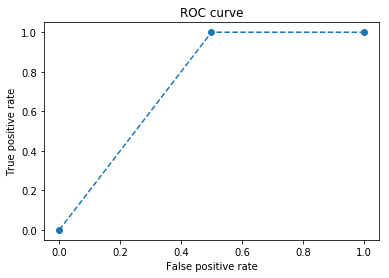

points:  [(0.0, 0.0), (0.5, 1.0), (1.0, 1.0)]


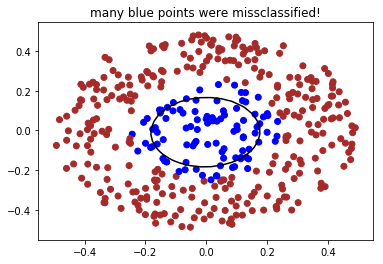

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

df = pd.read_csv('https://raw.githubusercontent.com/adasegroup/ML2020_seminars/master/seminar4/data/dataset0.csv')
X = df[['X1', 'X2']]
y = df['y']

# improve the ranges for hyperparameters C and gamma
clf = GridSearchCV(
                   svm.SVC(kernel='rbf'),                 # kernel is changed to non-linear 'rbf'
                   {'C': [1], 'gamma': [1]},    # YOUR IMPROVEMENT HERE !!!
                   scoring=make_scorer(accuracy_score),   # we can skip this line because accuracy_score is by default
                   cv = [(np.array(range(len(y))), np.array(range(len(y))))]  # only 1 split and training and testing sets are the same
                  )
clf.fit(X, y) # note that we use the initial X, not X_transform !
print('best params:', clf.best_params_)
print('accuracy on the training set:', clf.best_score_)

# ROC - curve
plt.figure()
from sklearn.metrics import accuracy_score, make_scorer, roc_curve
fpr, tpr, _ = roc_curve(y, clf.predict(X))
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot(fpr, tpr, '--o')
plt.show()
print('points: ', list(zip(fpr, tpr)))

# Plot classification
xx1 = np.linspace(X['X1'].min(), X['X1'].max(), 30)
xx2 = np.linspace(X['X2'].min(), X['X2'].max(), 30)
XX1, XX2 = np.meshgrid(xx1, xx2)
xy = np.vstack([XX1.ravel(), XX2.ravel()]).T
Z = clf.decision_function(xy).reshape(XX1.shape)
plt.scatter(X['X1'], X['X2'], c=['brown' if c == 1 else 'b' for c in y])
plt.contour(XX1, XX2, Z, colors='k', levels=[0], linestyles=['-'])
plt.title('many blue points were missclassified!')       # YOUR IMPROVEMENT HERE :)
plt.show()

### Solution 2.4:
It gets the values of the point:
```
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y, clf.predict(X))
TN = C[0, 0]
FN = C[1, 0]
FP = C[0, 1]
TP = C[1, 1]
tpr = TP/(TP + FN)
fpr = FP/(FP + TN)

print('False positive rate:', fpr)
print('True positive rate:', tpr)
```
Blue points are "negative" or 0-class, browns are "positive" or 1-class. Missclassified blue points are "negative" points that were classified as "positive" but it is False (outside the curve), so their number is FP. The percentage of them among all blue (negative) is exactly fpr.

### Solution 2.5:
We can use for example this grid of hyperparameters:
```
{'C': [1, 100], 'gamma': [1, 100]}
```
It provides 
```
best params: {'C': 100, 'gamma': 100}
accuracy on the training set: 1.0
```

# Example 3: Training and testing sets

best params: {'C': 1, 'gamma': 1.5}
accuracy on the training set: 0.7073170731707317
accuracy on the testing set: 0.7804878048780488


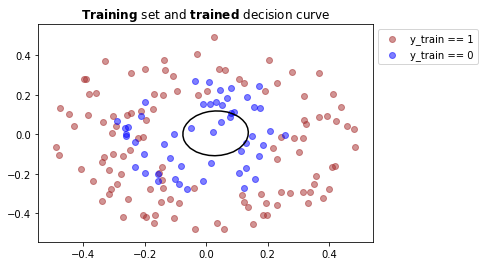

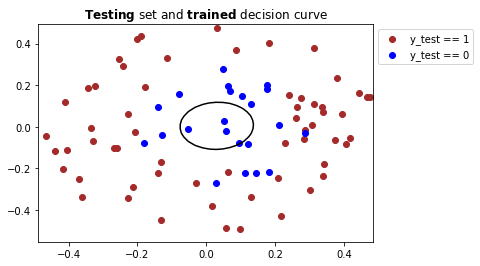

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/adasegroup/ML2020_seminars/master/seminar4/data/dataset1.csv')
X = df[['X1', 'X2']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

clf = GridSearchCV(svm.SVC(kernel='rbf'),                                     # kernel is 'rbf'!
                            {'C': [1], 'gamma': [1.5]},                       # Underfitting
#                           {'C': [1000], 'gamma': [100]},                    # Overfitting
#                      ... YOUR IMPROVEMENT HERE !!!
                   scoring=make_scorer(accuracy_score),
                   cv=3)    # we can skip this line because accuracy is by default
clf.fit(X_train, y_train) # note that we use X_train, no explicit X_transform !
print('best params:', clf.best_params_)
print('accuracy on the training set:', clf.score(X_train, y_train))
print('accuracy on the testing set:', clf.score(X_test, y_test))

# plots results
xx1 = np.linspace(X['X1'].min(), X['X1'].max(), 50)
xx2 = np.linspace(X['X2'].min(), X['X2'].max(), 50)
XX1, XX2 = np.meshgrid(xx1, xx2)
xy = np.vstack([XX1.ravel(), XX2.ravel()]).T
Z = clf.decision_function(xy).reshape(XX1.shape)

def flter(vv, mask):
    return [v for v, m in zip(vv, mask) if m]

plt.scatter(flter(X_train['X1'], y_train), flter(X_train['X2'], y_train), c='brown', alpha = 0.5, label='y_train == 1')
plt.scatter(flter(X_train['X1'], 1-y_train), flter(X_train['X2'], 1-y_train), c='b', alpha = 0.5, label='y_train == 0')
plt.legend(bbox_to_anchor=(0.999, 1))
plt.contour(XX1, XX2, Z, colors='k', levels=[0], linestyles=['-'])
plt.title('$\mathbf{Training}$ set and $\mathbf{trained}$ decision curve')
plt.show()

plt.scatter(flter(X_test['X1'], y_test), flter(X_test['X2'], y_test), c='brown', label='y_test == 1')
plt.scatter(flter(X_test['X1'], 1-y_test), flter(X_test['X2'], 1-y_test), c='b', label='y_test == 0')
plt.legend(bbox_to_anchor=(0.999, 1))
plt.contour(XX1, XX2, Z, colors='k', levels=[0], linestyles=['-'])
plt.title('$\mathbf{Testing}$ set and $\mathbf{trained}$ decision curve')
plt.show()

### Question 3.1: Try different sets of hyperparameters including:
#### Underfitting:
```
accuracy on the training set: 0.707317073171 - poor :(
accuracy on the testing set: 0.780487804878  - poor :(
```
#### Overfitting:
```
accuracy on the training set: 1.0            - even 1.0! but it is useless :| 
accuracy on the testing set: 0.841463414634  - poor :(
```
### See the decision curve in both cases (it is the hyperplane in the space set by RBF kernel!). Tune the hyperparameters $C$ and $\gamma$ aiming to increase the score on the testing set that is always unseen for model training.


### Solution 3.1:
We can use for example this grid of hyperparameters:
```
{'C': [1, 10, 100, 10**3, 10**4, 10**5, 10**6],
 'gamma': [1, 1.5, 2, 2.5, 3, 5, 10, 100]},

```
or even shorter ranges. The scores are
```
best params: {'C': 10, 'gamma': 2}
accuracy on the training set: 0.841463414634
accuracy on the testing set: 0.878048780488
```